### Task 1 - Data Collection
Here you will obtain the required data for the analysis. As described in the project instructions, you will perform a web scrap to obtain data from the NCDC website, import data from the JoHn Hopkins repository, and import the provided external data.


### A - NCDC Website scrap
Website - https://covid19.ncdc.gov.ng/

In [2]:
# Import all libraries in this cell
import requests
import numpy as np
import urllib.request
import pandas as pd
import csv
from bs4 import BeautifulSoup
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')

In [142]:
# Assign the url of the webpage to a variable
url = 'https://covid19.ncdc.gov.ng/'

#Assign the result of a request of the webpage to a variable using requests.get() method
feedback = requests.get(url)

#Get the status_code of the feedback. Status_code that begins with 2 generally indicate success.
print(feedback.status_code)

200


In [143]:
#Read the text-based contents of the web files
#To make the text more readable than the way it comes from the request modules, 
#BeautifulSoup module will be used to parse data from the html files
soup = BeautifulSoup(feedback.text,"html.parser")

In [144]:
#Extract from the web file, table with id:custom1 using BeautifulSoup's findAll() method
table = soup.findAll('table',{"id":"custom1"})[0]
values =[]

In [145]:
#Extract the table rows from the table with list 'tr' argument in table.findAll() method
tr = table.findAll(['tr'])

In [146]:
#Create a csv file 'nig_covid.csv' and open in append mode
csvFile = open("nig_covid.csv",'wt',newline='',encoding='utf-8')

#Write the extracted data to the file using the .writer()method
writer = csv.writer(csvFile)  

#Use for loop to extract all the table_head 'th' and table_data 'td' from the table
#Remove the newline in the text column of 'th' using strip() method
#Replace the newline in 'td' with space(' ') using replace() method
#Write data into the file with writereow() method
try:   
        for cell in tr:
            th = cell.find_all('th')
            th_data = [col.text.strip('\n') for col in th]
            td = cell.find_all('td')
            row = [i.text.replace('\n','') for i in td]
            writer.writerow(th_data+row)      

#Close the csvFile from append mode        
finally:   
    csvFile.close()

In [147]:
# Save the data to a DataFrame object.
dfnig = pd.read_csv('nig_covid.csv')

### B - John Hopkins Data Repository
Here you will obtain data from the John Hopkins repository. Your task here involves saving the data from the GitHub repo link to DataFrame for further analysis. Find the links below. 
* Global Daily Confirmed Cases - Click [Here](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv)
* Global Daily Recovered Cases - Click [Here](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv)
* Global Daily Death Cases - Click [Here](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv)

In [148]:
#Save the data from John Hopkins repository raw link into a DataFrame
confirmed_global = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
df_confirmed_global = pd.read_csv(confirmed_global)


recovered_global = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
df_recovered_global = pd.read_csv(recovered_global)


deaths_global = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
df_deaths_global = pd.read_csv(deaths_global)

### C - External Data 
* Save the external data to a DataFrame
* External Data includes but not limited to: `covid_external.csv`, `Budget data.csv`, `RealGDP.csv`

In [149]:
#Save the external data to a DataFrame using pd.read_csv() method
df_external = pd.read_csv('covid_external.csv')

In [150]:
#Save the budget data to a DataFrame using pd.read_csv() method
df_budget = pd.read_csv('Budget data.csv')

In [151]:
#Save the readgdp data to a DataFrame using pd.read_csv() method
df_readgdp = pd.read_csv('RealGDP.csv')

### Task 2 - View the data
Obtain basic information about the data using the `head()` and `info()` method.

In [152]:
#Display the first few rows of the dfnig data
dfnig.head()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,...,"56,444 ...","1,273","54,756 ...",415
1,...,"19,350 ...","7,271","11,926 ...",153
2,...,"8,944",104,"8,783",57
3,...,"8,658",169,"8,424",65
4,...,"6,766",868,"5,784",114


In [153]:
#Get basic information on the dfnig data
dfnig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   States Affected               37 non-null     object
 1   No. of Cases (Lab Confirmed)  37 non-null     object
 2   No. of Cases (on admission)   37 non-null     object
 3   No. Discharged                37 non-null     object
 4   No. of Deaths                 37 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 1.6+ KB


In [154]:
#Display the first few rows of the df_confirmed data
df_confirmed_global.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/26/21,2/27/21,2/28/21,3/1/21,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21,3/7/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,55696,55707,55714,55733,55759,55770,55775,55827,55840,55847
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,105229,106215,107167,107931,108823,109674,110521,111301,112078,112897
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,112805,112960,113092,113255,113430,113593,113761,113948,114104,114234
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,10822,10849,10866,10889,10908,10948,10976,10998,11019,11042
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,20759,20782,20807,20854,20882,20923,20981,21026,21055,21086


In [155]:
#Display the basic information of the df_confirmed_global data
df_confirmed_global.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Columns: 415 entries, Province/State to 3/7/21
dtypes: float64(2), int64(411), object(2)
memory usage: 888.5+ KB


In [156]:
#Display the first few rows of the df_recovered_global data
df_recovered_global.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/26/21,2/27/21,2/28/21,3/1/21,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21,3/7/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,49285,49288,49333,49344,49347,49359,49362,49362,49369,49378.0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,68007,68969,69773,70413,71173,72076,72853,73610,74352,75190.0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,77842,77976,78098,78234,78377,78524,78672,78824,78946,79064.0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,10394,10429,10446,10475,10501,10560,10564,10584,10599,10626.0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,19307,19315,19322,19400,19410,19509,19553,19624,19640,19647.0


In [157]:
#Display the basic information of the df_recovered_global data
df_recovered_global.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Columns: 415 entries, Province/State to 3/7/21
dtypes: float64(3), int64(410), object(2)
memory usage: 839.9+ KB


In [158]:
#Display the first few rows of the df_deaths_global data
df_deaths_global.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/26/21,2/27/21,2/28/21,3/1/21,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21,3/7/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,2442,2443,2443,2444,2446,2446,2446,2449,2449,2449
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,1756,1775,1796,1816,1835,1856,1876,1897,1918,1939
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,2977,2979,2983,2987,2991,2996,3002,3007,3010,3013
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,110,110,110,110,110,112,112,112,112,112
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,504,506,508,508,510,510,511,511,512,514


In [159]:
#Display the basic information of the df_deaths_global data
df_deaths_global.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Columns: 415 entries, Province/State to 3/7/21
dtypes: float64(2), int64(411), object(2)
memory usage: 888.5+ KB


In [160]:
#Display the first few rows of the df_external data
df_external.head()

,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
1,Plateau,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
2,Kwara,North Central,3524000,0.3,0.4,0.3,0.2,0.4,0.2,0.6,0.7,0.93
3,Nassarawa,North Central,2783000,0.1,0.3,0.5,0.9,0.0,0.1,0.6,0.5,0.85
4,Niger,North Central,6260000,0.6,0.0,0.6,0.3,0.7,0.1,0.8,0.8,0.84


In [161]:
#Display the basic information of the df_external data
df_external.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   states                   37 non-null     object 
 1   region                   37 non-null     object 
 2   Population               37 non-null     int64  
 3   Overall CCVI Index       37 non-null     float64
 4   Age                      37 non-null     float64
 5   Epidemiological          37 non-null     float64
 6   Fragility                37 non-null     float64
 7   Health System            37 non-null     float64
 8   Population Density       37 non-null     float64
 9   Socio-Economic           37 non-null     float64
 10   Transport Availability  37 non-null     float64
 11  Acute IHR                37 non-null     float64
dtypes: float64(9), int64(1), object(2)
memory usage: 3.6+ KB


### Task 3 - Data Cleaning and Preparation
From the information obtained above, you will need to fix the data format. 
<br>
Examples: 
* Convert to appropriate data type.
* Rename the columns of the scraped data.
* Remove comma(,) in numerical data
* Extract daily data for Nigeria from the Global daily cases data

TODO A - Clean the scraped data

In [164]:
#Rename the columns in the dfnig using columns attribute
dfnig.columns = ['states', 'cases_lab_confirmed', 'cases_on_admission', 'discharged', 'deaths']

In [165]:
dfnig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   states               37 non-null     object
 1   cases_lab_confirmed  37 non-null     object
 2   cases_on_admission   37 non-null     object
 3   discharged           37 non-null     object
 4   deaths               37 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 1.6+ KB


In [166]:
#Use regular expression to match the string and 
#use the replace() method to stripe out the commas in the numberic columns 
dfnig = dfnig.replace({',':'', ' ':''}, regex=True)

#use the apply() method to convert the datatype of the affected columns to appropriate datatype
#and make the change in the original dataframe
a = dfnig[['cases_lab_confirmed', 'cases_on_admission', 'discharged']].columns
dfnig[a] = dfnig[a].apply(pd.to_numeric,errors='coerce')

In [167]:
#confirm the change in the datatypes
dfnig.dtypes

states                 object
cases_lab_confirmed     int64
cases_on_admission      int64
discharged              int64
deaths                  int64
dtype: object

TODO B - Get a Pandas DataFrame for Daily Confirmed Cases in Nigeria. Columns are Date and Cases

In [168]:
#delete other columns aside date and country/region using the drop()method
df_confirmed_global = df_confirmed_global.drop(['Province/State', 'Lat', 'Long'], axis=1, errors ='ignore')


In [169]:
#Display the resulting dataframe
df_confirmed_global

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,2/26/21,2/27/21,2/28/21,3/1/21,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21,3/7/21
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,55696,55707,55714,55733,55759,55770,55775,55827,55840,55847
1,Albania,0,0,0,0,0,0,0,0,0,...,105229,106215,107167,107931,108823,109674,110521,111301,112078,112897
2,Algeria,0,0,0,0,0,0,0,0,0,...,112805,112960,113092,113255,113430,113593,113761,113948,114104,114234
3,Andorra,0,0,0,0,0,0,0,0,0,...,10822,10849,10866,10889,10908,10948,10976,10998,11019,11042
4,Angola,0,0,0,0,0,0,0,0,0,...,20759,20782,20807,20854,20882,20923,20981,21026,21055,21086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,Vietnam,0,2,2,2,2,2,2,2,2,...,2426,2432,2448,2448,2475,2482,2488,2494,2501,2512
270,West Bank and Gaza,0,0,0,0,0,0,0,0,0,...,180848,181909,183612,185336,187309,189326,191203,193029,194548,196812
271,Yemen,0,0,0,0,0,0,0,0,0,...,2267,2269,2285,2310,2342,2363,2375,2411,2444,2473
272,Zambia,0,0,0,0,0,0,0,0,0,...,77639,78202,78534,79002,79557,80090,80687,81341,82011,82421


In [170]:
confirmed_nig = df_confirmed_global.groupby('Country/Region').sum().loc['Nigeria']
confirmed_nig

1/22/20         0
1/23/20         0
1/24/20         0
1/25/20         0
1/26/20         0
            ...  
3/3/21     156960
3/4/21     157671
3/5/21     158042
3/6/21     158237
3/7/21     158506
Name: Nigeria, Length: 411, dtype: int64

In [171]:
#save the resulting series to dataframe with the index
confirmed_nig = confirmed_nig.to_frame().reset_index()

In [172]:
# Title the columns with Date and Cases
confirmed_nig.columns = ['Date', 'Cases']

#Save the Date column with datetime format
confirmed_nig['Date'] = pd.to_datetime(confirmed_nig['Date'])

#Display basic information about the table using the info()method
confirmed_nig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    411 non-null    datetime64[ns]
 1   Cases   411 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.5 KB


In [173]:
#Display the first few rows
confirmed_nig.head()

,Date,Cases
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0


TODO C - Get a Pandas DataFrame for Daily Recovered Cases in Nigeria. Columns are Date and Cases

In [174]:
df_recovered_global = df_recovered_global.drop(['Province/State', 'Lat', 'Long'], axis=1, errors='ignore')

In [175]:
recovered_nig = df_recovered_global.groupby('Country/Region').sum().loc['Nigeria']
recovered_nig

1/22/20         0.0
1/23/20         0.0
1/24/20         0.0
1/25/20         0.0
1/26/20         0.0
             ...   
3/3/21     135812.0
3/4/21     136335.0
3/5/21     137025.0
3/6/21     137645.0
3/7/21     137890.0
Name: Nigeria, Length: 411, dtype: float64

In [176]:
recovered_nig = recovered_nig.to_frame().reset_index()
recovered_nig

,index,Nigeria
0,1/22/20,0.0
1,1/23/20,0.0
2,1/24/20,0.0
3,1/25/20,0.0
4,1/26/20,0.0
...,...,...
406,3/3/21,135812.0
407,3/4/21,136335.0
408,3/5/21,137025.0
409,3/6/21,137645.0


In [177]:
recovered_nig.columns = ['Date', 'Cases']
recovered_nig['Date'] = pd.to_datetime(recovered_nig['Date'])
recovered_nig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    411 non-null    datetime64[ns]
 1   Cases   411 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.5 KB


In [178]:
recovered_nig.tail()

,Date,Cases
406,2021-03-03,135812.0
407,2021-03-04,136335.0
408,2021-03-05,137025.0
409,2021-03-06,137645.0
410,2021-03-07,137890.0


TODO D - Get a Pandas DataFrame for Daily Death Cases in Nigeria. Columns are Date and Cases

In [179]:
df_deaths_global = df_deaths_global.drop(['Province/State', 'Lat', 'Long'], axis=1, errors='ignore')

In [180]:
deaths_nig = df_deaths_global.groupby('Country/Region').sum().loc['Nigeria']

In [181]:
deaths_nig = deaths_nig.to_frame().reset_index()

In [182]:
deaths_nig.columns = ['Date', 'Cases']

In [183]:
deaths_nig['Date'] = pd.to_datetime(deaths_nig['Date'])

In [184]:
deaths_nig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    411 non-null    datetime64[ns]
 1   Cases   411 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.5 KB


In [185]:
deaths_nig.tail()

,Date,Cases
406,2021-03-03,1939
407,2021-03-04,1951
408,2021-03-05,1954
409,2021-03-06,1964
410,2021-03-07,1969


### Task 4 - Analysis
Here you will perform some analyses on the datasets. You are welcome to communicate findings in charts and summary. 
<br>
We have included a few TODOs to help with your analysis. However, do not let this limit your approach, feel free to include more, and be sure to support your findings with chart and summary 

TODO A - Generate a plot that shows the Top 10 states in terms of Confirmed Covid cases by Laboratory test

In [186]:
# Use the nlargest() method to get the top 10 list of states
top_10 = dfnig.nlargest(10, 'cases_lab_confirmed')
top_10

,states,cases_lab_confirmed,cases_on_admission,discharged,deaths
0,Lagos,56444,1273,54756,415
1,FCT,19350,7271,11926,153
2,Plateau,8944,104,8783,57
3,Kaduna,8658,169,8424,65
4,Oyo,6766,868,5784,114
5,Rivers,6680,289,6294,97
6,Edo,4670,216,4274,180
7,Ogun,4437,403,3987,47
8,Kano,3844,157,3579,108
9,Ondo,3066,928,2080,58


Text(0.5, 0, 'Confirmed Cases by Laboratory')

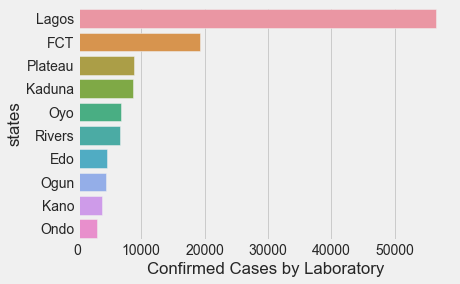

In [187]:
#Generate the seaborn bar plot using the column states and cases_lab_confirmed 
top_10_case = sns.barplot(x='cases_lab_confirmed', y='states', data=top_10[['states', 'cases_lab_confirmed']])
top_10_case.set_xlabel('Confirmed Cases by Laboratory')

Top 3 Confirmed States - Lagos, Abuja and Pleteau

TODO B - Generate a plot that shows the Top 10 states in terms of Discharged Covid cases. Hint - Sort the values

Text(0.5, 0, 'Discharged Cases')

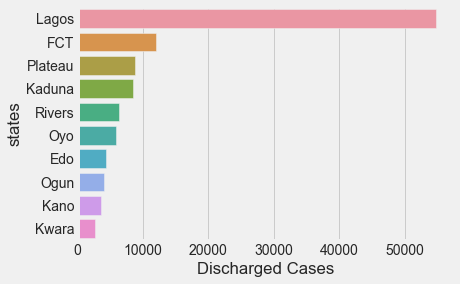

In [188]:
top_discharged = dfnig.nlargest(10, 'discharged')
discharged_plot = sns.barplot(x='discharged', y='states', data=top_discharged[['states', 'discharged']])
discharged_plot.set_xlabel('Discharged Cases')

Top 3 state with discharge case - Lagos, Abuja and Plateau

Cases on admission represents the active cases in each states. Let's determine the states with high values of active cases.
<br>
TODO C: Plot the top 10 active cases

Text(0.5, 0, 'Top 10 Active Cases')

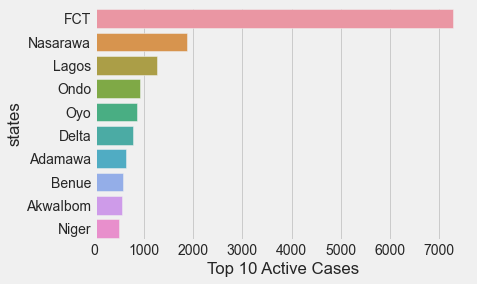

In [189]:
#Get the list of the top 10 active case
top_active = dfnig.nlargest(10, 'cases_on_admission')

#Generate a seaborn bar plot of states vs cases_on_admission
active_plot = sns.barplot(x='cases_on_admission', y='states', data=top_active[['states', 'cases_on_admission']])
active_plot.set_xlabel('Top 10 Active Cases')

It is shown from the chart above that FCT(Abuja) has the highest number of active cases, even though Lagos has the highest number of confirmed cases.

TODO D - Plot the top 10 Death cases

Text(0.5, 0, 'Top 10 Death Cases')

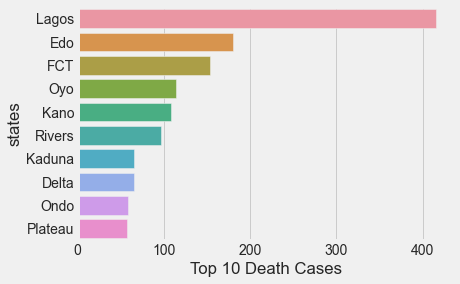

In [190]:
#Get the list of states with the top deaths case
top_deaths = dfnig.nlargest(10, 'deaths')

#Generate a seaborn plot of states with the highest death case record
deaths_plot = sns.barplot(x='deaths', y='states', data=top_deaths[['states', 'deaths']])
deaths_plot.set_xlabel('Top 10 Death Cases')

Top 3 states with death cases-Lagos, Edo and FCT(Abuja)

TODO E - Generate a line plot for the total daily confirmed, recovered and death cases in Nigeria

Use the xticks()method to rotate the x axis scale to avoid overlapping

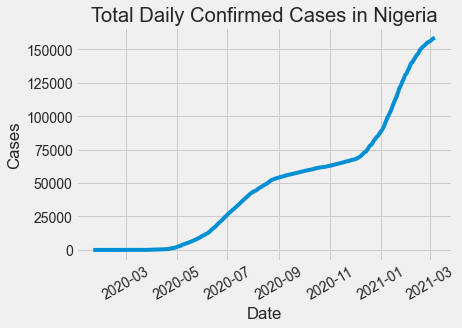

In [191]:
#Generate a seaborn line plot of the total daily confirmed case with date
sns.lineplot(x="Date", y="Cases", data=confirmed_nig)
plt.xticks(rotation=30)
plt.title('Total Daily Confirmed Cases in Nigeria')
plt.show()

#### From the chart above, you will discover that there has been no case recorded until May 2020 and the confirmed case keep increasing till March 2021

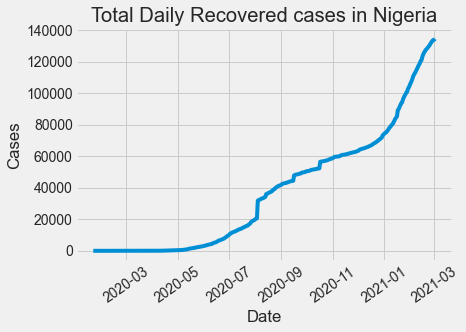

In [79]:
#Generate lineplot for total daily recovered cases
sns.lineplot(x="Date", y="Cases", data=recovered_nig)
plt.xticks(rotation=35)
plt.title('Total Daily Recovered cases in Nigeria')
plt.show()

You can see that as the confirmed cases are increasing so the recovered cases

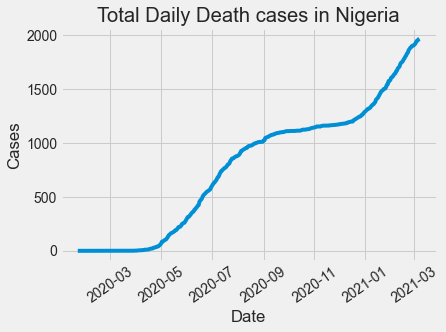

In [192]:
#Generate a lineplot for the daily death cases
sns.lineplot(x="Date", y="Cases", data=deaths_nig)
plt.xticks(rotation=35)
plt.title('Total Daily Death cases in Nigeria')
plt.show()

It can be seen from the charts that since the confirmed cases in May 2020, there is a fast increase in the death cases until september 2020 to january 2021

TODO F - 
* Determine the daily infection rate, you can use the Pandas `diff` method to find the derivate of the total cases.
* Generate a line plot for the above

In [193]:
#Use the diff() method to get the daily infection rate
daily_inf_rate = confirmed_nig['Cases'].diff()
daily_inf_rate

0        NaN
1        0.0
2        0.0
3        0.0
4        0.0
       ...  
406    464.0
407    711.0
408    371.0
409    195.0
410    269.0
Name: Cases, Length: 411, dtype: float64

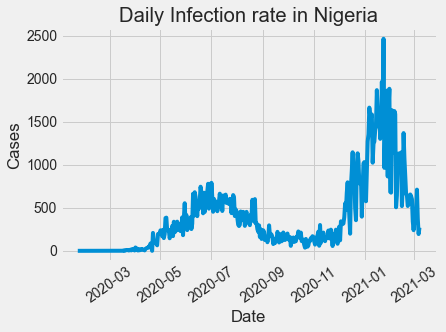

In [194]:
#Generate a line plot from the above table
sns.lineplot(x="Date", y=daily_inf_rate, data=confirmed_nig)
plt.xticks(rotation=35)
plt.title('Daily Infection rate in Nigeria')
plt.show()

The maximum figure can be observed to be around late january 2021. It is really important that people continue keep to the preventive measures during this period.

TODO G - 
* Calculate maximum infection rate for a day (Number of new cases)
* Find the date

In [195]:
#Use the max()method to get the maximum infection rate for a day
daily_inf_rate.max()

2464.0

In [196]:
#Create a new column of Max_Inf_Rate and save the value of the daily_inf_rate.max in it
confirmed_nig['Max_Inf_Rate'] = confirmed_nig['Cases'].diff()

#Use the loc attribute to get the date
confirmed_nig.loc[confirmed_nig['Max_Inf_Rate'] == daily_inf_rate.max()]

,Date,Cases,Max_Inf_Rate
367,2021-01-23,120602,2464.0


### The maximum infection rate was recorded on 23rd of January, 2021. Meaning there were 2464 new cases on that day. 
 

TODO H - Determine the relationship between the external dataset and the NCDC COVID-19 dataset. 
Here you will generate a line plot of top 10 confirmed cases and the overall community vulnerability index on the same axis. From the graph, explain your observation.
<br>
Steps
* Combine the two dataset together on a common column(states)
* Create a new dataframe for plotting. This DataFrame will contain top 10 states in terms of confirmed cases i.e sort by confirmed cases. ** Hint: Check out Pandas [nlargest](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nlargest.html) function. This [tutorial](https://cmdlinetips.com/2019/03/how-to-select-top-n-rows-with-the-largest-values-in-a-columns-in-pandas/) can help out ** 
* Plot both variable on the same axis. Check out this [tutorial](http://kitchingroup.cheme.cmu.edu/blog/2013/09/13/Plotting-two-datasets-with-very-different-scales/)

In [197]:
#Combine the two dataset using merge() method on a common column states
df_join = pd.merge(dfnig, df_external, how='outer', on= ['states'])

In [198]:
#Display the first few rows of the merging tables
df_join.head()

,states,cases_lab_confirmed,cases_on_admission,discharged,deaths,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,Lagos,56444.0,1273.0,54756.0,415.0,South West,13992000.0,0.0,0.1,1.0,0.3,0.1,1.0,0.1,0.4,0.93
1,FCT,19350.0,7271.0,11926.0,153.0,North Central,4865000.0,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
2,Plateau,8944.0,104.0,8783.0,57.0,North Central,4766000.0,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
3,Kaduna,8658.0,169.0,8424.0,65.0,North West,9227000.0,0.7,0.1,0.9,0.8,0.9,0.4,0.6,0.4,0.86
4,Oyo,6766.0,868.0,5784.0,114.0,South West,8737000.0,0.2,0.7,0.8,0.2,0.8,0.6,0.2,0.3,1.06


In [212]:
#Get the top 10 based on confirmed cases using nlargest() method
df_topcases = df_join.nlargest(11, 'cases_lab_confirmed')
df_topcases

,states,cases_lab_confirmed,cases_on_admission,discharged,deaths,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,Lagos,56444.0,1273.0,54756.0,415.0,South West,13992000.0,0.0,0.1,1.0,0.3,0.1,1.0,0.1,0.4,0.93
1,FCT,19350.0,7271.0,11926.0,153.0,North Central,4865000.0,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
2,Plateau,8944.0,104.0,8783.0,57.0,North Central,4766000.0,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
3,Kaduna,8658.0,169.0,8424.0,65.0,North West,9227000.0,0.7,0.1,0.9,0.8,0.9,0.4,0.6,0.4,0.86
4,Oyo,6766.0,868.0,5784.0,114.0,South West,8737000.0,0.2,0.7,0.8,0.2,0.8,0.6,0.2,0.3,1.06
5,Rivers,6680.0,289.0,6294.0,97.0,South South,7763000.0,0.4,0.5,0.9,0.6,0.6,0.9,0.1,0.1,1.00
6,Edo,4670.0,216.0,4274.0,180.0,South South,4705000.0,0.1,0.9,0.8,0.1,0.1,0.5,0.4,0.3,1.09
7,Ogun,4437.0,403.0,3987.0,47.0,South West,5878000.0,0.3,0.6,0.7,0.5,0.6,0.6,0.0,0.2,1.07
8,Kano,3844.0,157.0,3579.0,108.0,North West,14726000.0,0.6,0.2,0.1,0.3,0.4,0.8,0.8,0.5,0.87
9,Ondo,3066.0,928.0,2080.0,58.0,South West,5185000.0,0.1,0.8,0.5,0.1,0.3,0.6,0.3,0.3,1.04


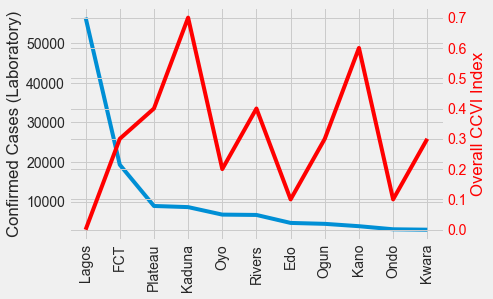

In [218]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(df_topcases['states'], df_topcases['cases_lab_confirmed'])
ax1.set_ylabel('Confirmed Cases (Laboratory)')
ax2 = ax1.twinx()
ax2.plot(df_topcases['states'], df_topcases['Overall CCVI Index'], 'r-')
ax2.set_ylabel('Overall CCVI Index', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=90)
plt.show()

#### Write Your Observation Here
#### Observation
You will notice that the states with the highest vulnerability index score in relation to the confirmed cases are Northern states(Kaduna and Kano) with weak health systems, more poverty etc. Lagos has a high number of confirmed cases but has less vulnerability index score because of good health system, more social distancing etc.  

TODO I - Determine the relationship between the external dataset and the NCDC COVID-19 dataset. 
* Here you will generate a regression plot between two variables to visualize the linear relationships - Confirmed Cases and Population Density.
Hint: Check out Seaborn [Regression Plot](https://seaborn.pydata.org/generated/seaborn.regplot.html).
* Provide a summary of your observation

<AxesSubplot:xlabel='Population Density', ylabel='cases_lab_confirmed'>

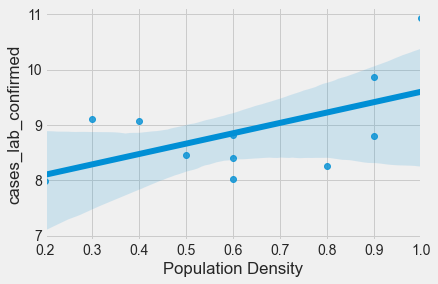

In [201]:
sns.regplot(df_topcases['Population Density'], np.log(df_topcases['cases_lab_confirmed']))

In [ ]:
ax = sns.regplot(x="total_bill", y="tip", data=tips)

#### Observation
Confirmed cases and Population density have positive correlation. There are high cases in areas that are densely populated. 

TODO J - 
* Provide more analyses by extending TODO G & H. Meaning, determine relationships between more features.
* Provide a detailed summary of your findings. 
* Note that you can have as many as possible.

In [202]:
#Use the diff() method to get the daily recovery rate
daily_rec_rate = recovered_nig['Cases'].diff()
daily_rec_rate

0         NaN
1         0.0
2         0.0
3         0.0
4         0.0
        ...  
406    1261.0
407     523.0
408     690.0
409     620.0
410     245.0
Name: Cases, Length: 411, dtype: float64

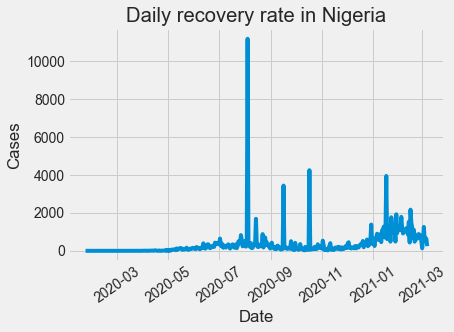

In [203]:
#Generate a line plot from the above table
sns.lineplot(x="Date", y=daily_rec_rate, data=recovered_nig)
plt.xticks(rotation=35)
plt.title('Daily recovery rate in Nigeria')
plt.show()

In [204]:
daily_rec_rate.max()

11188.0

In [205]:
recovered_nig['Max Recovery Rate'] = recovered_nig['Cases'].diff()
recovered_nig.loc[recovered_nig['Max Recovery Rate'] == daily_rec_rate.max()]

,Date,Cases,Max Recovery Rate
195,2020-08-04,31851.0,11188.0


#### The maximum recovery rate was recorded on August 4, 2020 with 11188

In [206]:
#Use the diff() method to get the daily death rate
daily_death_rate = deaths_nig['Cases'].diff()
daily_death_rate

0       NaN
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
406    16.0
407    12.0
408     3.0
409    10.0
410     5.0
Name: Cases, Length: 411, dtype: float64

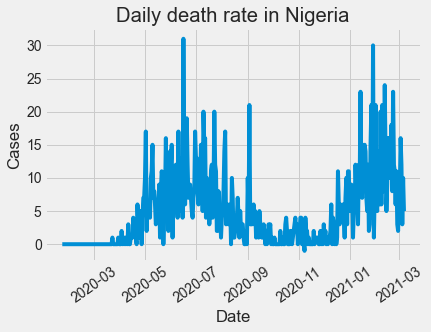

In [207]:
#Generate a line plot from the above table
sns.lineplot(x="Date", y=daily_death_rate, data=deaths_nig)
plt.xticks(rotation=35)
plt.title('Daily death rate in Nigeria')
plt.show()

In [208]:
daily_death_rate.max()

31.0

In [209]:
deaths_nig['Max Death Rate'] = deaths_nig['Cases'].diff()
deaths_nig.loc[deaths_nig['Max Death Rate'] == daily_death_rate.max()]

,Date,Cases,Max Death Rate
146,2020-06-16,455,31.0


### It was seen that on 16th June, 2020, the case recorded was 455 and only that day the maximum death rate was recorded with 31 deaths

In [213]:
#Get the top 11 based on death cases using nlargest() method
df_topdeath = df_join.nlargest(11, 'deaths')
df_topdeath

,states,cases_lab_confirmed,cases_on_admission,discharged,deaths,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,Lagos,56444.0,1273.0,54756.0,415.0,South West,13992000.0,0.0,0.1,1.0,0.3,0.1,1.0,0.1,0.4,0.93
6,Edo,4670.0,216.0,4274.0,180.0,South South,4705000.0,0.1,0.9,0.8,0.1,0.1,0.5,0.4,0.3,1.09
1,FCT,19350.0,7271.0,11926.0,153.0,North Central,4865000.0,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
4,Oyo,6766.0,868.0,5784.0,114.0,South West,8737000.0,0.2,0.7,0.8,0.2,0.8,0.6,0.2,0.3,1.06
8,Kano,3844.0,157.0,3579.0,108.0,North West,14726000.0,0.6,0.2,0.1,0.3,0.4,0.8,0.8,0.5,0.87
5,Rivers,6680.0,289.0,6294.0,97.0,South South,7763000.0,0.4,0.5,0.9,0.6,0.6,0.9,0.1,0.1,1.00
3,Kaduna,8658.0,169.0,8424.0,65.0,North West,9227000.0,0.7,0.1,0.9,0.8,0.9,0.4,0.6,0.4,0.86
11,Delta,2582.0,773.0,1744.0,65.0,South South,6303000.0,0.4,0.6,0.7,0.2,1.0,0.6,0.5,0.4,1.08
9,Ondo,3066.0,928.0,2080.0,58.0,South West,5185000.0,0.1,0.8,0.5,0.1,0.3,0.6,0.3,0.3,1.04
2,Plateau,8944.0,104.0,8783.0,57.0,North Central,4766000.0,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93


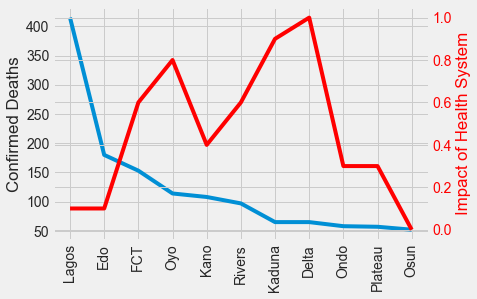

In [222]:
#Use a graph to display the relationship between death cases and heal3.0
.t33h system on each states
fig1 = plt.figure()
ax11 = fig1.add_subplot(111)
ax11.plot(df_topdeath['states'], df_topdeath['deaths'])
ax11.set_ylabel('Confirmed Deaths')
ax21 = ax11.twinx()
ax21.plot(df_topdeath['states'], df_topdeath['Health System'], 'r-')
ax21.set_ylabel('Impact of Health System', color='r')
for tl in ax21.get_yticklabels():
    tl.set_color('r')
plt.setp(ax11.xaxis.get_majorticklabels(), rotation=90)
plt.show()

#### Observation 
You will notice that the states with the highest vulnerability index score in relation to the death cases are Delta, Kaduna and Oyo states with weak health systems, less social distancing etc. Lagos has a high number of confirmed death cases but has less vulnerability index score because of good health system, more social distancing etc. 

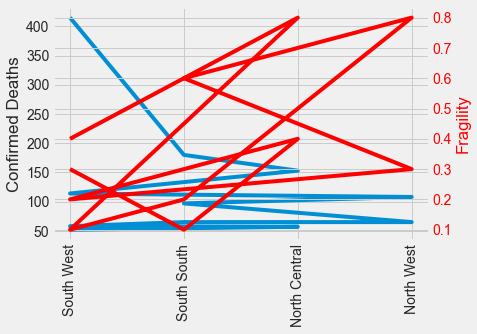

In [224]:
#Use a graph to display the relationship between death cases and fragility rate on each region
fig1 = plt.figure()
ax11 = fig1.add_subplot(111)
ax11.plot(df_topdeath['region'], df_topdeath['deaths'])
ax11.set_ylabel('Confirmed Deaths')
ax21 = ax11.twinx()
ax21.plot(df_topdeath['region'], df_topdeath['Fragility'], 'r-')
ax21.set_ylabel('Fragility', color='r')
for tl in ax21.get_yticklabels():
    tl.set_color('r')
plt.setp(ax11.xaxis.get_majorticklabels(), rotation=90)
plt.show()

#### Observation
You will notice that the North Central and North West Regions part of Nigeria are the most fragile with weak health system, household crowding and transportation difficulties. Despite South West recording the highest death case, the fragility level is very minimal because of good health system, easy transportation access etc. 

In [225]:
#Get the top populated states using nlargest() method
df_toppopulated = df_join.nlargest(11, 'Population')
df_toppopulated

,states,cases_lab_confirmed,cases_on_admission,discharged,deaths,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
8,Kano,3844.0,157.0,3579.0,108.0,North West,14726000.0,0.6,0.2,0.1,0.3,0.4,0.8,0.8,0.5,0.87
0,Lagos,56444.0,1273.0,54756.0,415.0,South West,13992000.0,0.0,0.1,1.0,0.3,0.1,1.0,0.1,0.4,0.93
3,Kaduna,8658.0,169.0,8424.0,65.0,North West,9227000.0,0.7,0.1,0.9,0.8,0.9,0.4,0.6,0.4,0.86
4,Oyo,6766.0,868.0,5784.0,114.0,South West,8737000.0,0.2,0.7,0.8,0.2,0.8,0.6,0.2,0.3,1.06
15,Katsina,2060.0,1.0,2025.0,34.0,North West,8713000.0,0.7,0.1,0.1,0.3,0.2,0.6,0.9,0.8,0.85
5,Rivers,6680.0,289.0,6294.0,97.0,South South,7763000.0,0.4,0.5,0.9,0.6,0.6,0.9,0.1,0.1,1.00
23,Bauchi,1274.0,61.0,1196.0,17.0,North East,7270000.0,0.8,0.1,0.2,0.8,0.8,0.2,0.8,0.8,0.85
22,Borno,1308.0,70.0,1200.0,38.0,North East,6651000.0,0.9,0.3,0.1,1.0,1.0,0.1,0.7,0.9,0.89
31,Jigawa,496.0,56.0,429.0,11.0,North West,6435000.0,0.9,0.4,0.0,0.7,0.6,0.5,0.9,0.8,0.92
24,Benue,1188.0,575.0,591.0,22.0,North Central,6376000.0,0.5,0.7,0.5,0.7,0.4,0.4,0.3,0.5,0.91


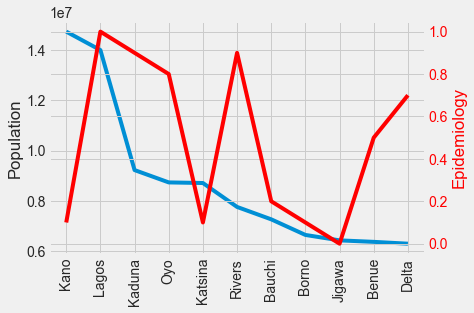

In [229]:
#Use a graph to display the relationship between top populated states and their epidemiology
fig2 = plt.figure()
ax12 = fig2.add_subplot(111)
ax12.plot(df_toppopulated['states'], df_toppopulated['Population'])
ax12.set_ylabel('Population')
ax22 = ax12.twinx()
ax22.plot(df_toppopulated['states'], df_toppopulated['Epidemiological'], 'r-')
ax22.set_ylabel('Epidemiology', color='r')
for tl in ax22.get_yticklabels():
    tl.set_color('r')
plt.setp(ax12.xaxis.get_majorticklabels(), rotation=90)
plt.show()

#### Observation
You will notice that Kano has the largest poulation but unfortunately the epidemiology in the states and others like Katsina and Jigawa are so low which means the health system that deals with the control of the disease is very small hence makes them more vulnerable.

There is direct proportion in the population and Epidemiology of Lagos state. This makes the state to be less vulnerable to this deadly disease.

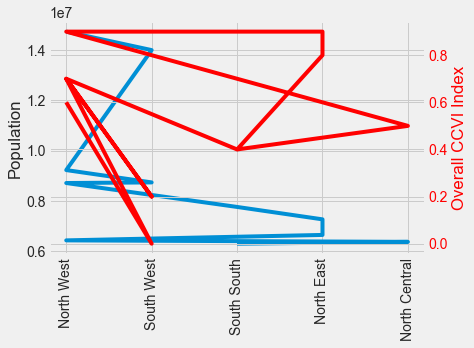

In [230]:
#Use a graph to display the relationship between regional population and their Overall CCVI Index
fig2 = plt.figure()
ax12 = fig2.add_subplot(111)
ax12.plot(df_toppopulated['region'], df_toppopulated['Population'])
ax12.set_ylabel('Population')
ax22 = ax12.twinx()
ax22.plot(df_toppopulated['region'], df_toppopulated['Overall CCVI Index'], 'r-')
ax22.set_ylabel('Overall CCVI Index', color='r')
for tl in ax22.get_yticklabels():
    tl.set_color('r')
plt.setp(ax12.xaxis.get_majorticklabels(), rotation=90)
plt.show()

Observation

Generally speaking, North west are more vulnerable to this deadly disease despite the increase in the population even with the states that are low populated in this region part of the country. 


### Impact on the Nigeria Economy 
<br>
### TODO K -Determine the effect of the Pandemic on the economy. A way to do this is to explore the initial and the revised budget (from budget data).
<br>
Steps
* Combine the budget data with your data on common column(states)
* Create a groupby object, by grouping by region and aggregating on Initial, Revised budget and confirmed cases. Sum is the aggregating function
* Determine the changes in budget(Initial - Revised)
* Check your groupby data or object, write down your observation. For example, what region has the highest reduction in budget and why is that?
* Generate a plot for your result. e.g barplot showing total reduction for each region. 

In [98]:
df_join2 = pd.merge(df_join, df_budget, how='outer', on=['states'])

In [99]:
df_join2.head()

,states,cases_lab_confirmed,cases_on_admission,discharged,deaths,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR,Initial_budget (Bn),Revised_budget (Bn)
0,Lagos,56132.0,1688.0,54034.0,410.0,South West,13992000.0,0.0,0.1,1.0,0.3,0.1,1.0,0.1,0.4,0.93,1680.00,920.5
1,FCT,19292.0,7224.0,11919.0,149.0,North Central,4865000.0,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79,278.78,199.0
2,Plateau,8916.0,106.0,8753.0,57.0,North Central,4766000.0,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93,177.30,122.0
3,Kaduna,8600.0,163.0,8374.0,63.0,North West,9227000.0,0.7,0.1,0.9,0.8,0.9,0.4,0.6,0.4,0.86,259.25,223.6
4,Oyo,6752.0,874.0,5764.0,114.0,South West,8737000.0,0.2,0.7,0.8,0.2,0.8,0.6,0.2,0.3,1.06,213.00,174.0


In [235]:
dfgroup = df_join2.groupby('region')['Initial_budget (Bn)', 'Revised_budget (Bn)', 'cases_lab_confirmed'].sum()

In [236]:
dfgroup['changes'] = abs(dfgroup['Revised_budget (Bn)'] - dfgroup['Initial_budget (Bn)'])

In [237]:
dfgroup

,Initial_budget (Bn),Revised_budget (Bn),cases_lab_confirmed,changes
region,,,,
North Central,1136.08,760.00,33249.0,376.08
North East,951.13,720.01,6448.0,231.12
North West,1385.07,1078.50,16323.0,306.57
South East,640.86,470.20,6865.0,170.66
South South,1526.08,1026.45,16402.0,499.63
South West,2774.80,1699.20,73553.0,1075.60


From the table, the south west region recorded the highest amount of confirmed cases, and also the highest amount of reduction in budget. This is because, the south west region experienced the longest duration of Lock-down, and as such was forced to shut down major economic activities. The effect is seen in budget reduction. 

Text(0, 0.5, 'Region')

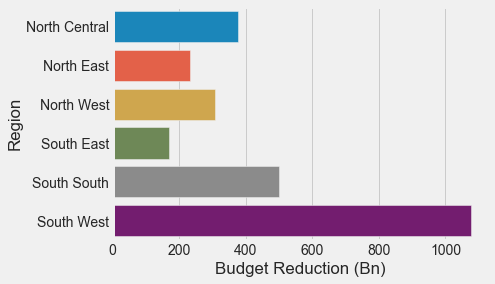

In [238]:
dfplot = dfgroup.reset_index()
y = dfplot['region']
ax = sns.barplot(x='changes', y=y, data=dfplot)
ax.set_xlabel('Budget Reduction (Bn)')
ax.set_ylabel('Region')

### TODO L - 
Determine the effect of the Pandemic on the economy. To do this, you will compare the Real GDP value Pre-COVID-19 with Real GDP in 2020 (COVID-19 Period, especially Q2 2020)
<br>
Steps
* From the Real GDP Data, generate a `barplot` using the GDP values for each year & quarters. For example: On x-axis you will have year 2017 and the bars will be values of each quarters(Q1-Q4). You expected to have subplots of each quarters on one graph.
<br>
Hint: Use [Pandas.melt](https://pandas.pydata.org/docs/reference/api/pandas.melt.html) to create your plot DataFrame 
* Set your quarter legend to lower left.
* Using `axhline`, draw a horizontal line through the graph at the value of Q2 2020.
* Write out your observation

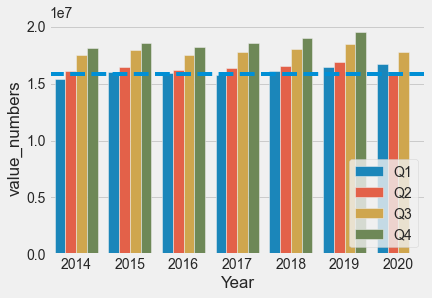

In [234]:
columns = ["Year", "Q1", "Q2", "Q3", "Q4"]
test_data_melted = pd.melt(df_readgdp, id_vars=columns[0],\
                           var_name="source", value_name="value_numbers")
g = sns.barplot(x=columns[0], y="value_numbers", hue="source",\
                data=test_data_melted)
plt.legend(loc='lower right')

g.axhline(1.589e7, ls='--')
plt.show()

Observation

From the chart above, it can be seen that since 2014, the GDP has been increasing gradually until 2020 when the economy experience a pandemic and contrary to the normal trend of increment, there has been reduction from in the quarters of the year 2020. During the second quarter in 2020 (Q2) the economy size has been pulled down to the size of the first quarter in 2017 due to the several movement restriction on some products and services. We should also note that the ecomomy might not balance back from the pandemic to the pre-pandemic level in the next two years(2022).

### Note: Do not limit your analysis to the provided TODOs. Perform more analyses e.g 
* Check for more external dataset
* Ask more questions & find the right answers by exploring the data

In [3]:
#Save the owid covid data to a DataFrame using pd.read_csv() method
df_owid = pd.read_csv('owid-covid-data.csv')

In [4]:
#Display the first few details of the table using head() method
df_owid.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [5]:
#Get basic information about the table
df_owid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72775 entries, 0 to 72774
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               72775 non-null  object 
 1   continent                              69168 non-null  object 
 2   location                               72775 non-null  object 
 3   date                                   72775 non-null  object 
 4   total_cases                            71729 non-null  float64
 5   new_cases                              71727 non-null  float64
 6   new_cases_smoothed                     70726 non-null  float64
 7   total_deaths                           62606 non-null  float64
 8   new_deaths                             62764 non-null  float64
 9   new_deaths_smoothed                    70726 non-null  float64
 10  total_cases_per_million                71337 non-null  float64
 11  ne

In [6]:
#Drop.. unusued columns
df_owid = df_owid.drop(['icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 
                                          'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 
                                          'new_tests', 'new_tests_per_thousand', 'total_vaccinations', 'people_vaccinated', 
                                          'people_fully_vaccinated', 'new_vaccinations', 'new_vaccinations_smoothed',
                                         'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
                                         'people_fully_vaccinated_per_hundred', 'new_vaccinations_smoothed_per_million', 'hospital_beds_per_thousand', 
                                          'extreme_poverty'], axis=1, errors='ignore')

In [19]:
#Extract the row with Nigeria details from the whole table
owid_nig = df_owid[df_owid['iso_code'].str.contains("NGA") | df_owid['location'].str.contains('Nigeria')] 

In [55]:
#Convert the date column type from object ot datetime datatype 
owid_nig['date'] = pd.to_datetime(owid_nig['date'])
#Display information about the table to confirm the changes
owid_nig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 1 to 371
Data columns (total 39 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   iso_code                         371 non-null    object        
 1   continent                        371 non-null    object        
 2   location                         371 non-null    object        
 3   date                             371 non-null    datetime64[ns]
 4   total_cases                      371 non-null    float64       
 5   new_cases                        371 non-null    float64       
 6   new_cases_smoothed               366 non-null    float64       
 7   total_deaths                     347 non-null    float64       
 8   new_deaths                       347 non-null    float64       
 9   new_deaths_smoothed              366 non-null    float64       
 10  total_cases_per_million          371 non-null    float64      

In [21]:
#Reset the index column to start from initial counting 1 using the range() method
owid_nig.index = range(1, owid_nig.shape[0]+1)
owid_nig

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,life_expectancy,human_development_index
1,NGA,Africa,Nigeria,2020-02-28,1.0,1.0,NaN,NaN,NaN,NaN,...,2.751,1.447,5338.454,181.013,2.42,0.6,10.8,41.949,54.69,0.539
2,NGA,Africa,Nigeria,2020-02-29,1.0,0.0,NaN,NaN,NaN,NaN,...,2.751,1.447,5338.454,181.013,2.42,0.6,10.8,41.949,54.69,0.539
3,NGA,Africa,Nigeria,2020-03-01,1.0,0.0,NaN,NaN,NaN,NaN,...,2.751,1.447,5338.454,181.013,2.42,0.6,10.8,41.949,54.69,0.539
4,NGA,Africa,Nigeria,2020-03-02,1.0,0.0,NaN,NaN,NaN,NaN,...,2.751,1.447,5338.454,181.013,2.42,0.6,10.8,41.949,54.69,0.539
5,NGA,Africa,Nigeria,2020-03-03,1.0,0.0,NaN,NaN,NaN,NaN,...,2.751,1.447,5338.454,181.013,2.42,0.6,10.8,41.949,54.69,0.539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,NGA,Africa,Nigeria,2021-02-28,155657.0,240.0,511.857,1907.0,2.0,9.714,...,2.751,1.447,5338.454,181.013,2.42,0.6,10.8,41.949,54.69,0.539
368,NGA,Africa,Nigeria,2021-03-01,156017.0,360.0,485.857,1915.0,8.0,7.571,...,2.751,1.447,5338.454,181.013,2.42,0.6,10.8,41.949,54.69,0.539
369,NGA,Africa,Nigeria,2021-03-02,156496.0,479.0,472.714,1923.0,8.0,7.000,...,2.751,1.447,5338.454,181.013,2.42,0.6,10.8,41.949,54.69,0.539
370,NGA,Africa,Nigeria,2021-03-03,156960.0,464.0,445.429,1939.0,16.0,7.714,...,2.751,1.447,5338.454,181.013,2.42,0.6,10.8,41.949,54.69,0.539


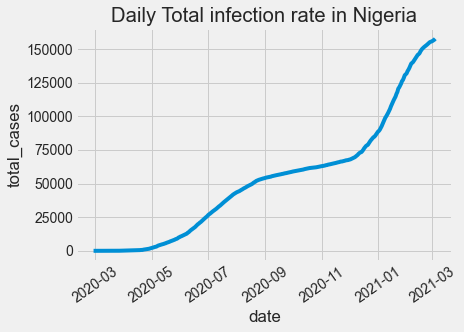

In [36]:
#Generate a lineplot for daily total infection rate using the date and total_cases columns as x and y respectively
#y = owid_nig['new_cases']
sns.lineplot(x="date", y='total_cases', data=owid_nig)
plt.xticks(rotation=35)
plt.title('Daily total infection rate in Nigeria')
plt.show()


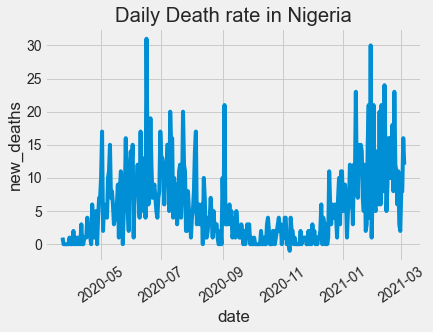

In [38]:
#Generate a plot to determine the daily death rate using the date and new_cases column as x and y respectively
sns.lineplot(x="date", y='new_deaths', data=owid_nig)
plt.xticks(rotation=35)
plt.title('Daily Death rate in Nigeria')
plt.show()

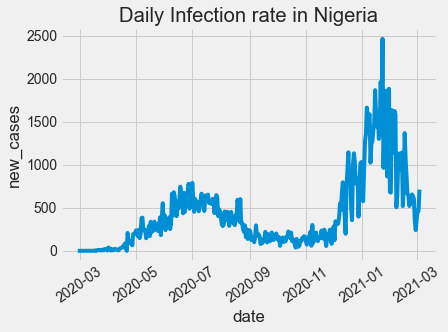

In [39]:
#Generate a plot to determine the daily infection rate using the date and new_cases column as x and y respectively
sns.lineplot(x="date", y='new_cases', data=owid_nig)
plt.xticks(rotation=35)
plt.title('Daily Infection rate in Nigeria')
plt.show()

Observation

From the plot above, it can be seen that there was rapid increment in the infection rate from December 2020 to January 2020. Probably because these are festive period and people do not practice the necessary preventive measures.

In [28]:
#Get the maximum new_cases recorded so far
owid_nig['new_cases'].max()

2464.0

In [32]:
# Extract out the row with the maximum new cases recorded
owid_nig.loc[owid_nig['new_cases'] == owid_nig['new_cases'].max()]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,life_expectancy,human_development_index,max_new_cases
331,NGA,Africa,Nigeria,2021-01-23,120602.0,2464.0,1665.571,1502.0,12.0,11.714,...,1.447,5338.454,181.013,2.42,0.6,10.8,41.949,54.69,0.539,981.0


Observations

From the resulting table the maximum new cases was recorded on 23 of January 2021 with 2464 new cases. This matches with result gotten from the analysed dataset above with different source. 

The evidence of this result can be gotten from the guardian news on 28th of January, 2021 where NCDC revealed that the highest record so far set on this date.  

Text(0.5, 0, 'New deaths cases by date')

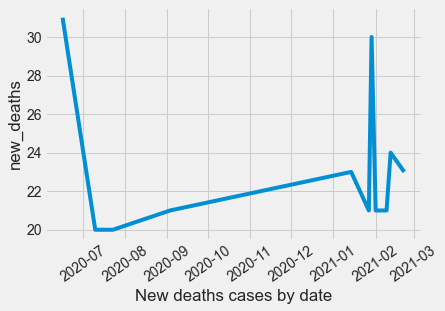

In [60]:
#Generate a line plot to show the dates of the highest deaths recorded
df_tcases = owid_nig.nlargest(11, 'new_deaths')
ax = sns.lineplot(x='date', y='new_deaths', data=df_tcases)
plt.xticks(rotation=35)
ax.set_xlabel('New deaths cases by date')

 Observation
 
 From the plot above, it shows that more death were recorded in mid 2020 and early 2021 respectively 

<AxesSubplot:xlabel='new_cases', ylabel='new_deaths'>

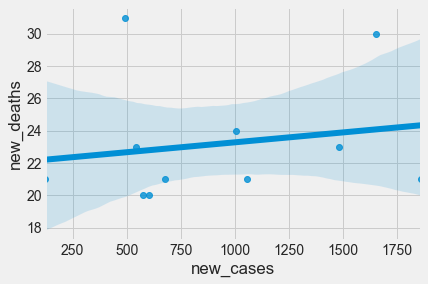

In [66]:
#Generate a regression plot between two variables to visualize the linear relationships- new_cases and new_deaths
sns.regplot(df_tcases['new_cases'], df_tcases['new_deaths'])

Observation

New case and New deaths have positive correlation. There are high death when there are more new cases.